<a href="https://colab.research.google.com/github/Raushan787/Well-Test-Analysis/blob/main/Pressure_Buildup_Test_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reservoir Parameters
h=78 #ft
u=1 #cp
q=600 #stb/day
Pwf=250 #psi
phie=0.2
Bo=1.1 #rbbl/stb
P_bar=2447 #psi (average reservoir pressure)
rw=.365 #ft
Ct=1.61*np.power(10,-5.0)
tp=1400 #hours (total production duration)


In [ ]:
#Loading data set
df=pd.read_excel("Buildup_test_dataset.xlsx")
df.head()

,Time (hrs),Pws (psi)
0,0.0000,250.00
1,0.0001,254.09
2,0.0002,258.16
3,0.0005,270.30
4,0.0008,282.33


In [ ]:
#Renaming the columns for convenience ,using Time(hrs) as t and Pws (psi) as P
df=df.rename(columns={"Time (hrs)":"t","Pws (psi)":"P"})
df.head()

,t,P
0,0.0000,250.00
1,0.0001,254.09
2,0.0002,258.16
3,0.0005,270.30
4,0.0008,282.33


In [ ]:
#Statistics information
df.describe()

,t,P
count,39.000000,39.000000
mean,17.712092,1572.601026
std,25.539327,799.160103
min,0.000000,250.000000
25%,0.013000,693.895000
50%,1.070000,2013.500000
75%,32.500000,2220.450000
max,80.000000,2272.600000


In [ ]:
#Get information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       39 non-null     float64
 1   P       39 non-null     float64
dtypes: float64(2)
memory usage: 756.0 bytes


In [ ]:
#Getting count of null values
df.isnull().sum()

,0
t,0
P,0


#**Cartesian Plot**#

Text(0, 0.5, 'Pressure(psi)')

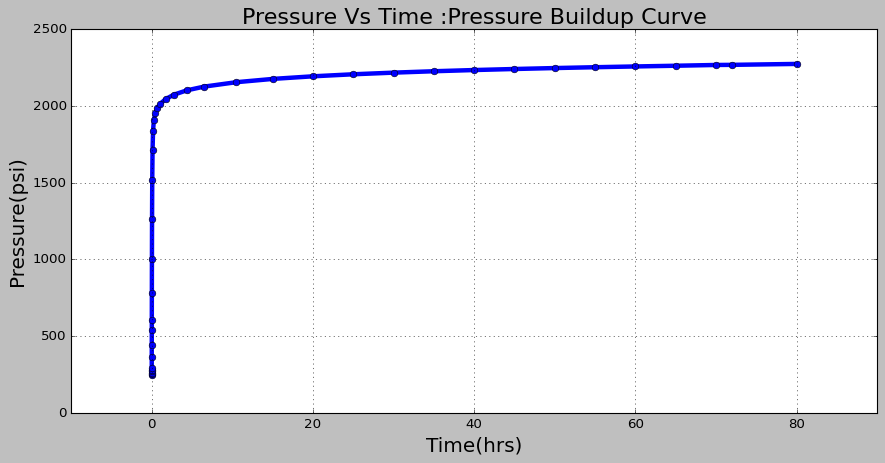

In [ ]:
#plots the pressure data against time on a Cartesian plot
plt.figure(figsize=(13,6))
plt.style.use("classic")
plt.plot(df["t"],df["P"],marker="o",lw=4,markersize=6)
plt.title("Pressure Vs Time :Pressure Buildup Curve",fontsize=20)
plt.grid()
plt.xlim(-10,90)
plt.xlabel("Time(hrs)",fontsize=18)
plt.ylabel("Pressure(psi)",fontsize=18)

Since Pressure is increasing with respect to time, so it is pressure buildup curve

**Semi-Log Plot**

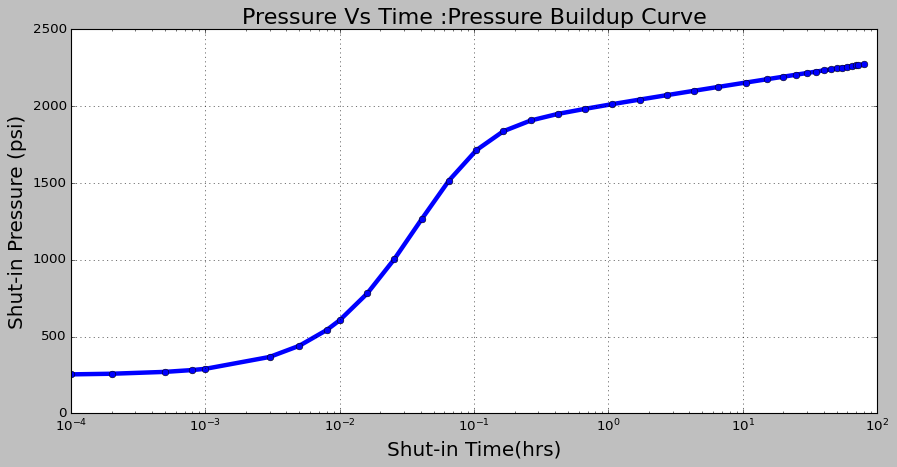

In [ ]:
plt.figure(figsize=(13,6))
plt.semilogx(df["t"],df["P"],marker="o",lw=4)
plt.title("Pressure Vs Time :Pressure Buildup Curve",fontsize=20)
plt.xlabel("Shut-in Time(hrs)",fontsize=18)
plt.ylabel("Shut-in Pressure (psi)",fontsize=18)
plt.grid()

#**Diagnostic Plot**#

In [ ]:
df.head()

,t,P
0,0.0000,250.00
1,0.0001,254.09
2,0.0002,258.16
3,0.0005,270.30
4,0.0008,282.33


In [ ]:
#In buildup test there is equivalent time (te) te=t/(1+(t/tp))
#Adding te column in data set
df["te"]=df["t"]/(1+(df["t"])/tp)
#Round off value upto 4 digit
df["te"]=np.round(df["te"],4)
#Seeing the change in time as time_equivalent
df[35:39]

,t,P,te
35,65.0,2260.8,62.1160
36,70.0,2265.8,66.6667
37,72.0,2266.6,68.4783
38,80.0,2272.6,75.6757


In [ ]:
#Adding difference in pressure
df["delta_P"]=df["P"]-df["P"][0]
df.head()

,t,P,te,delta_P
0,0.0000,250.00,0.0000,0.00
1,0.0001,254.09,0.0001,4.09
2,0.0002,258.16,0.0002,8.16
3,0.0005,270.30,0.0005,20.30
4,0.0008,282.33,0.0008,32.33


In [ ]:
#Adding the dP=d(delta_P)
df["d(delta_P)"]=np.zeros(len(df))
df["d(delta_P)"].iloc[1:]=np.diff(df["delta_P"])
df.head()

<ipython-input-314-a4c651a71de1>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["d(delta_P)"].iloc[1:]=np.diff(df["delta_P"])


,t,P,te,delta_P,d(delta_P)
0,0.0000,250.00,0.0000,0.00,0.00
1,0.0001,254.09,0.0001,4.09,4.09
2,0.0002,258.16,0.0002,8.16,4.07
3,0.0005,270.30,0.0005,20.30,12.14
4,0.0008,282.33,0.0008,32.33,12.03


In [ ]:
#Adding dte columns
df["dte"]=np.zeros(len(df))
df["dte"].iloc[1:]=np.diff(df["te"])
df.head()

<ipython-input-315-9a38220424c0>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["dte"].iloc[1:]=np.diff(df["te"])


,t,P,te,delta_P,d(delta_P),dte
0,0.0000,250.00,0.0000,0.00,0.00,0.0000
1,0.0001,254.09,0.0001,4.09,4.09,0.0001
2,0.0002,258.16,0.0002,8.16,4.07,0.0001
3,0.0005,270.30,0.0005,20.30,12.14,0.0003
4,0.0008,282.33,0.0008,32.33,12.03,0.0003


In [ ]:
#Horner's Time for horner plot
df["t_h"]=np.zeros(len(df))
df["t_h"].iloc[1:]=(df["t"].iloc[1:]+tp)/df["t"].iloc[1:]
df.head()

<ipython-input-316-605393f2e1cb>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["t_h"].iloc[1:]=(df["t"].iloc[1:]+tp)/df["t"].iloc[1:]


,t,P,te,delta_P,d(delta_P),dte,t_h
0,0.0000,250.00,0.0000,0.00,0.00,0.0000,0.0
1,0.0001,254.09,0.0001,4.09,4.09,0.0001,14000001.0
2,0.0002,258.16,0.0002,8.16,4.07,0.0001,7000001.0
3,0.0005,270.30,0.0005,20.30,12.14,0.0003,2800001.0
4,0.0008,282.33,0.0008,32.33,12.03,0.0003,1750001.0


In [ ]:
#Pdash=dp/dlog(te) =te*dp/dte
df["Pdash"]=np.zeros(len(df))
df["Pdash"].iloc[1:]=df["te"].iloc[1:]*df["d(delta_P)"].iloc[1:]/df["dte"].iloc[1:]
df.head()

<ipython-input-317-4e5b5a5d58bc>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Pdash"].iloc[1:]=df["te"].iloc[1:]*df["d(delta_P)"].iloc[1:]/df["dte"].iloc[1:]


,t,P,te,delta_P,d(delta_P),dte,t_h,Pdash
0,0.0000,250.00,0.0000,0.00,0.00,0.0000,0.0,0.000000
1,0.0001,254.09,0.0001,4.09,4.09,0.0001,14000001.0,4.090000
2,0.0002,258.16,0.0002,8.16,4.07,0.0001,7000001.0,8.140000
3,0.0005,270.30,0.0005,20.30,12.14,0.0003,2800001.0,20.233333
4,0.0008,282.33,0.0008,32.33,12.03,0.0003,1750001.0,32.080000


In [ ]:
df.tail()

,t,P,te,delta_P,d(delta_P),dte,t_h,Pdash
34,60.0,2256.2,57.5342,2006.2,5.0,4.6132,24.333333,62.358233
35,65.0,2260.8,62.1160,2010.8,4.6,4.5818,22.538462,62.362740
36,70.0,2265.8,66.6667,2015.8,5.0,4.5507,21.000000,73.248841
37,72.0,2266.6,68.4783,2016.6,0.8,1.8116,20.444444,30.239921
38,80.0,2272.6,75.6757,2022.6,6.0,7.1974,18.500000,63.085864


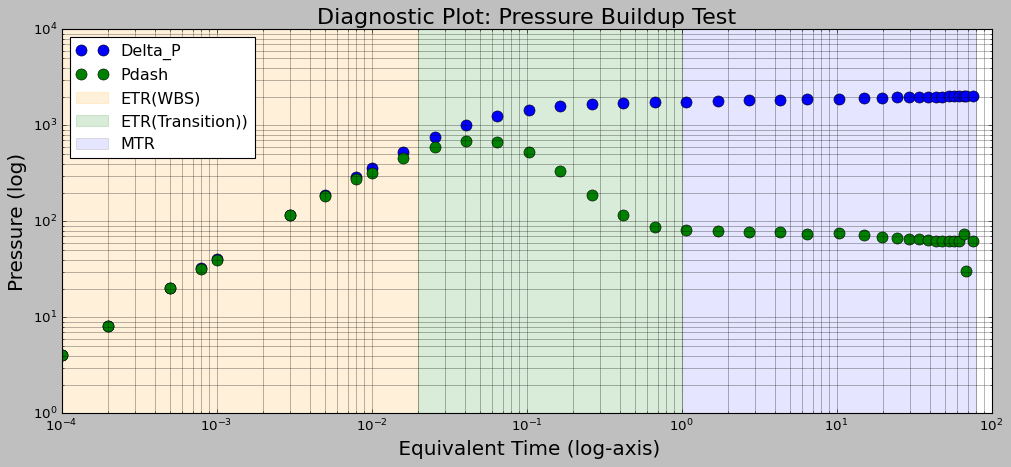

In [ ]:
#Diagnostic plot
plt.figure(figsize=(15,6))
plt.loglog(df["te"],df["delta_P"],"o",markersize=10,label="Delta_P")
plt.loglog(df["te"],df["Pdash"],"o",markersize=10,label="Pdash")
plt.axvspan(0.0001,0.02,color="orange",alpha=.15,label="ETR(WBS)")
plt.axvspan(0.02,1,color="green",alpha=.15,label="ETR(Transition))")
plt.axvspan(1,80,alpha=.1,label="MTR")
plt.title("Diagnostic Plot: Pressure Buildup Test",fontsize=20)
plt.xlabel(" Equivalent Time (log-axis)",fontsize=18)
plt.ylabel("Pressure (log)",fontsize=18)
plt.grid(True,which="both",linestyle="-",alpha=.5)
plt.legend(loc="best")

#**Analysis of EARLY TIME REGION(WBS)**

In [ ]:
#Making data frame of early timre region (wbs)
df_etr=df[(df["te"]>=0.0001) & (df["te"]<=.02
                                )]
df_etr.head()

,t,P,te,delta_P,d(delta_P),dte,t_h,Pdash
1,0.0001,254.09,0.0001,4.09,4.09,0.0001,14000001.0,4.090000
2,0.0002,258.16,0.0002,8.16,4.07,0.0001,7000001.0,8.140000
3,0.0005,270.30,0.0005,20.30,12.14,0.0003,2800001.0,20.233333
4,0.0008,282.33,0.0008,32.33,12.03,0.0003,1750001.0,32.080000
5,0.0010,290.29,0.0010,40.29,7.96,0.0002,1400001.0,39.800000


In [ ]:
#Finding input (x) and output (y)
x_etr=df_etr[["t"]]
y_etr=df_etr["delta_P"]

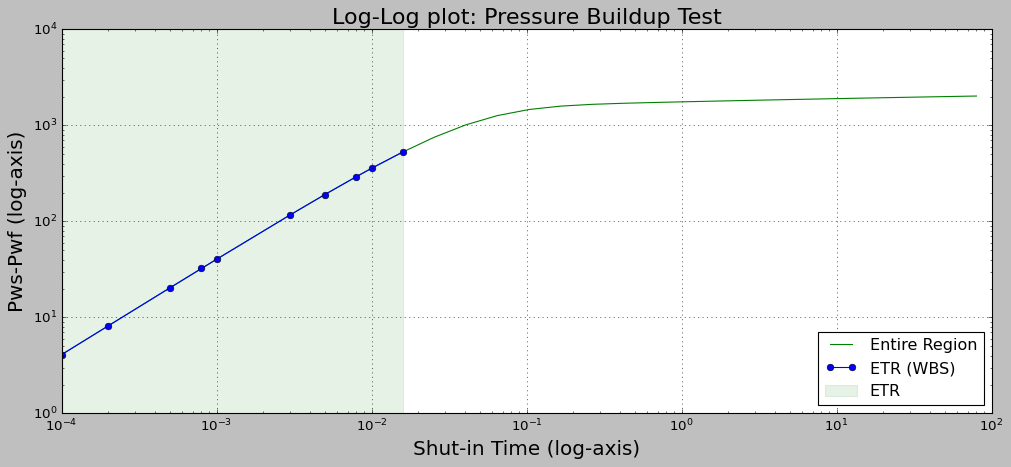

In [ ]:
#log log of early time region
plt.figure(figsize=(15,6))
plt.loglog(df["t"],df["delta_P"],color="green",label="Entire Region")
plt.loglog(x_etr,y_etr,marker="o",label="ETR (WBS)",color="blue")
plt.axvspan(df_etr["t"].iloc[0],df_etr["t"].iloc[-1],color="green",alpha=.1,label="ETR")
plt.xlabel("Shut-in Time (log-axis)",fontsize=18)
plt.ylabel("Pws-Pwf (log-axis)",fontsize=18)
plt.title("Log-Log plot: Pressure Buildup Test",fontsize=20)
plt.grid(True)
plt.legend(loc="best")

#Using Linear Regression #

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(np.log10(x_etr),np.log10(y_etr))

LinearRegression()

In [ ]:
#Slope of the line fit in the ETR datapoint
model.coef_[0]

np.float64(0.9641184617984231)

The slope must be 1 for unit slope line

In [ ]:
model.intercept_

np.float64(4.485511177148777)

In [ ]:
model.score(np.log10(x_etr),np.log10(y_etr))

0.9995913050416327

**Wellbore Storage Coefficient**

**C=qBo/((delta_P/delta_T)*24)**

In [ ]:
#Taking any set of data point for the calculation of wellbore storage coefficient
#I am taking the 4th index data
C=q*Bo*df_etr["t"][4]/(df_etr["delta_P"][4]*24)
C

np.float64(0.0006804825239715438)

In [ ]:
print("The wellbore storage coefficent is: ",np.round(C,5)  ,"rbbl/psi")

The wellbore storage coefficent is:  0.00068 rbbl/psi


#**Middle Time Region**#

In [ ]:
#Making the dataframe of middle time region
df_mtr=df[(df["te"]>=1) & (df["te"]<=80)]
df_mtr.head()


,t,P,te,delta_P,d(delta_P),dte,t_h,Pdash
19,1.07,2013.5,1.0692,1763.5,30.5,0.3975,1309.411215,82.039245
20,1.71,2043.1,1.7079,1793.1,29.6,0.6387,819.713450,79.151151
21,2.73,2072.1,2.7247,1822.1,29.0,1.0168,513.820513,77.710759
22,4.36,2100.7,4.3465,1850.7,28.6,1.6218,322.100917,76.649340
23,6.50,2124.9,6.4700,1874.9,24.2,2.1235,216.384615,73.733930


# Horner's Plot

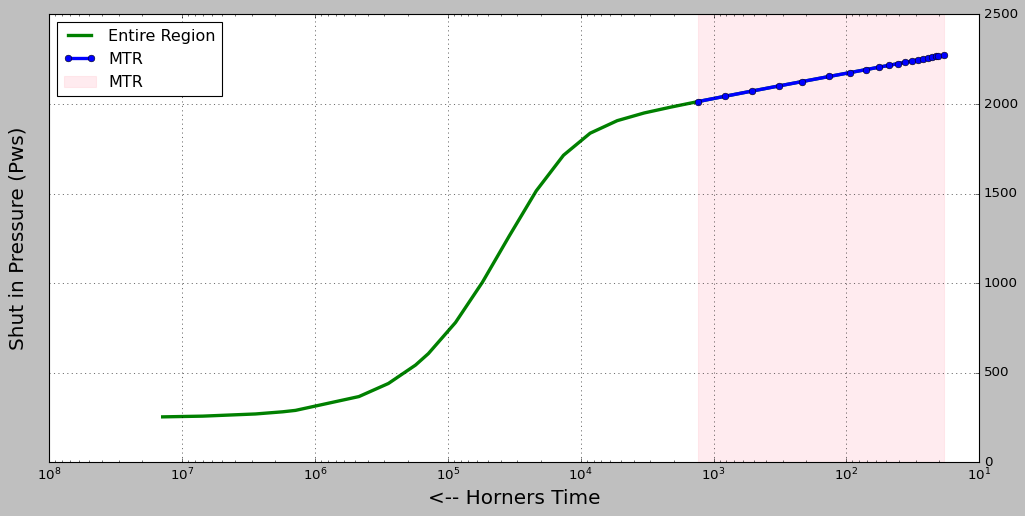

In [ ]:
fig ,ax=plt.subplots(figsize=(15,7))
ax.semilogx(df["t_h"].iloc[1:],df["P"].iloc[1:],color="green",lw=3,label="Entire Region")
ax.semilogx(df_mtr["t_h"],df_mtr["P"],marker="o",color="blue",lw=3,label="MTR")
ax.axvspan(df_mtr["t_h"].iloc[0],df_mtr["t_h"].iloc[-1],alpha=.3,label="MTR",color="pink")
ax.set_xlim(np.power(10,8.0),np.power(10,1.0))
ax.set_ylabel("Shut in Pressure (Pws)",fontsize=18,labelpad=20)
ax.yaxis.tick_right()
ax.set_xlabel("<-- Horners Time",fontsize=18)
ax.grid()
ax.legend(loc="best")

Using Linear Regression, Find the slope

In [ ]:
x_mtr=df_mtr[["t_h"]]
y_mtr=df_mtr["P"]

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(np.log10(x_mtr),(y_mtr))

LinearRegression()

In [ ]:
lm.coef_

array([-139.51561096])

In [ ]:
lm.intercept_

np.float64(2449.928661227544)

In [ ]:
lm.score(np.log10(x_mtr),y_mtr)

0.9999530122986369

In [ ]:
#Slope of straight line
m=np.abs(lm.coef_[0])
m

np.float64(139.51561095809598)

Equation of straight line : **Pws=-139.52*log(t_h)+2450**

In [ ]:
#Calculating horner time at shut in time =1 hr
t=1 #hr
t_h=(t+tp)/t
t_h

1401.0

In [ ]:
#Pws at shut in time =1 hr from straight line
Pws_1hr=-139.52*np.log10(t_h)+2450
Pws_1hr

np.float64(2011.0089513649286)

Permeability

**k=162.6*q*u*Bo/m*h**

In [ ]:
k=162.6*q*u*Bo/(m*h)
k

np.float64(9.861592866904296)

In [ ]:
print("The permeability of reservoir is :",np.round(k,3),"mD")

The permeability of reservoir is : 9.862 mD


**Skin**

**s=1.151*{((Pws_1hr-Pwf_t=0)/m)+3.23-log((k/phie*u*ct*rw^2))}**

In [ ]:
s=1.151*(((Pws_1hr-Pwf)/m)+3.23-np.log10(k/(phie*u*Ct*rw*rw)))
s

np.float64(9.772913211178532)

In [ ]:
print("The skin factor is : ", np.round(s,3))

The skin factor is :  9.773


In [ ]:
print("The pressure loss due to skin factor is :",np.round(0.87*m*s,3), "psi")

The pressure loss due to skin factor is : 1186.222 psi


# The formation permeability is of only 9.862 md which indicates that the well has poor permeability. The skin factor obtained is positive that means the Zone nearest to the wellbore is likely to be damaged. Since, the skin is positive, there is an additional pressure drop of 1186.222 psia. The well is damaged and a good candidate for stimulation.